In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def euclideanDistance(a,b):
    return np.linalg.norm(a-b)

In [3]:
def vector(word):
    i = vocab.index(word)
    return vectors[i]

In [4]:
def distance(w1,w2,metric):
    v1 = vector(w1)
    v2 = vector(w2)
    return metric(v1,v2)

In [5]:
vocab = []
vectors = []
with open(r'..\models\SBW-vectors-300-min5.txt', encoding='utf-8') as file:
    for line in file:
        line = line.rstrip()
        line = line.split(' ')
        if len(line) == 301:
            vocab.append(line[0])
            vectors.append(line[1:])
vectors = np.array(vectors,dtype=np.float)

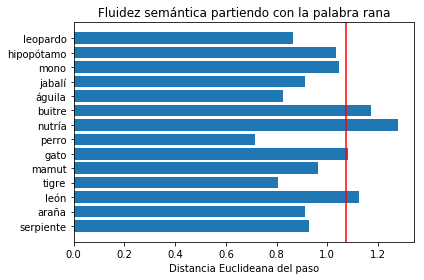

In [30]:
words = 'rana	serpiente	araña	león	tigre	mamut	gato	perro	nutría	buitre	águila	jabalí	mono	hipopótamo	leopardo'
words = words.split('\t')
words_in_vocab = [word for word in words if word in vocab]
distances = []
for i in range(1,len(words_in_vocab)):
    try:
        d = distance(words_in_vocab[i-1], words_in_vocab[i], euclideanDistance)
        distances.append(d)
    except:
        pass
p = np.percentile(distances,75)
plt.barh(words_in_vocab[1:],distances)
plt.title('Fluidez semántica partiendo con la palabra '+words_in_vocab[0])
plt.xlabel('Distancia Euclideana del paso')
plt.axvline(p,color='red')
plt.tight_layout()
plt.savefig('exploration.pdf')
plt.show()